In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.shape

(3276, 10)

In [5]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
corr = df.corr() # find corrleation relationship between features 
corr

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

In [7]:
df.describe(include='all')

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
y = df['Potability']
X = df.loc[:,df.columns != 'Potability']

In [9]:
plt.rcParams["figure.dpi"] = 100
# setting up DPI

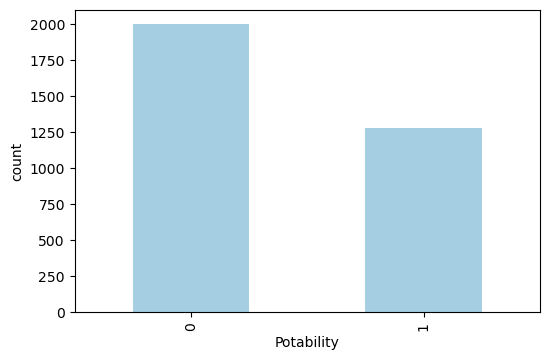

In [15]:
pd.value_counts(df['Potability']).plot.bar( stacked=True, colormap='Paired')
plt.ylabel('count')
plt.xlabel('Potability')
plt.show()

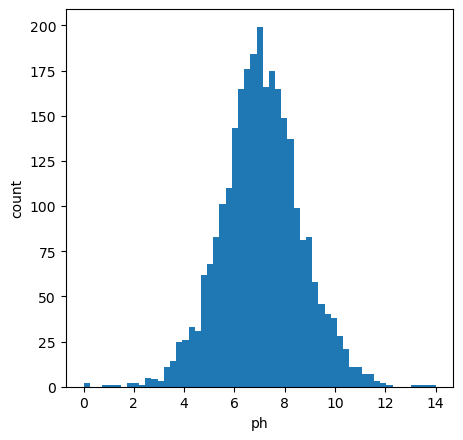

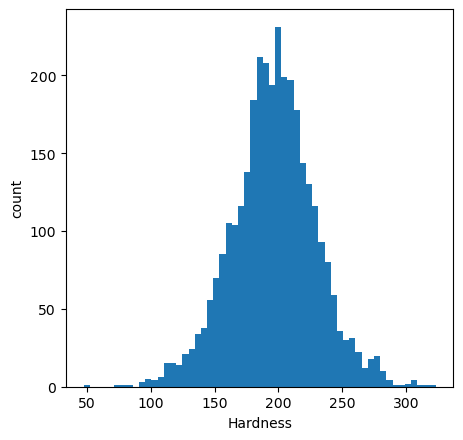

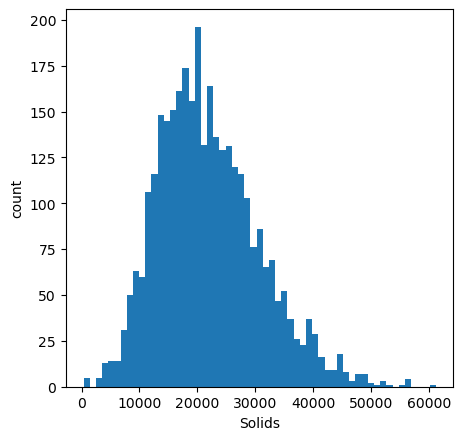

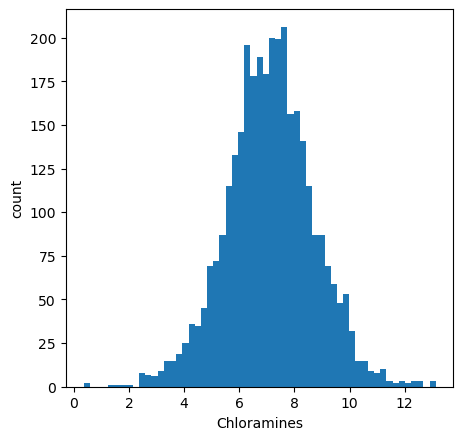

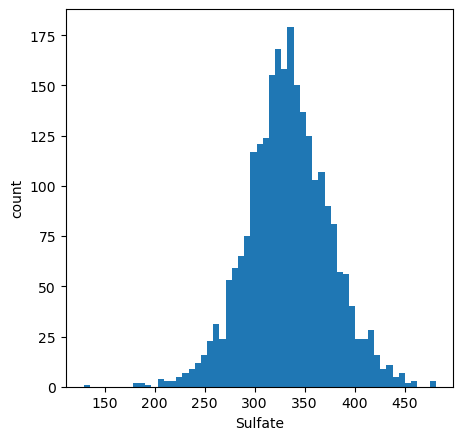

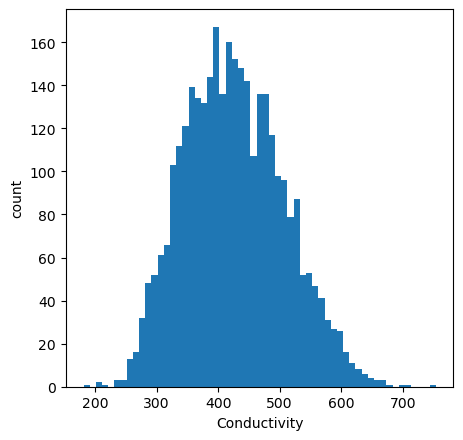

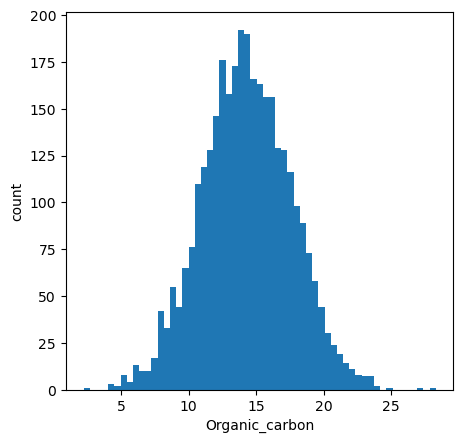

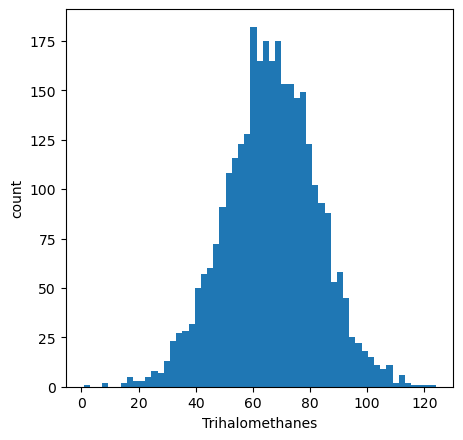

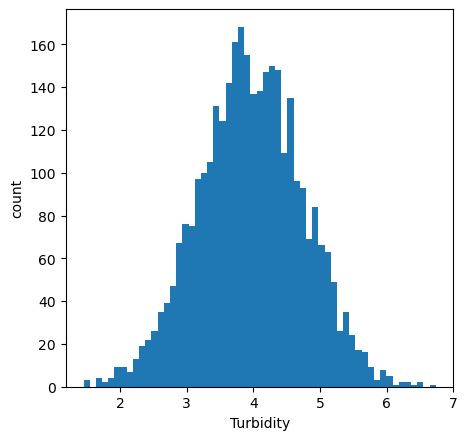

In [16]:
cols = X.columns

for col in cols:
    X[col].plot.hist(bins = int(np.sqrt(X.shape[0])),figsize=(5,5) )   
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

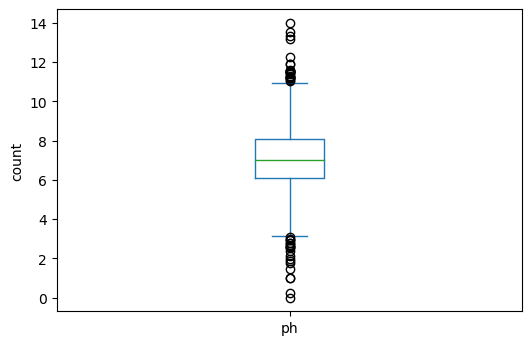

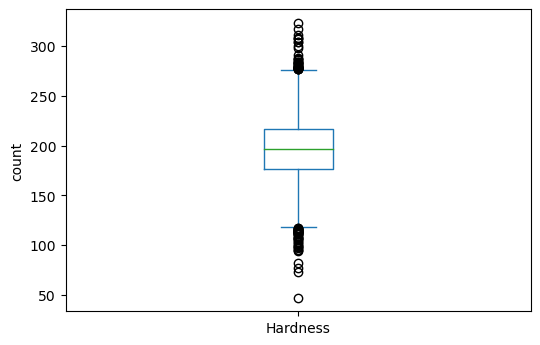

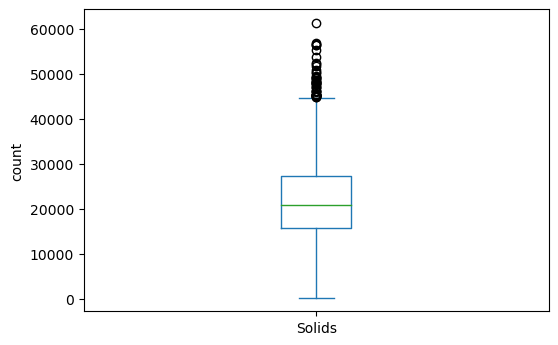

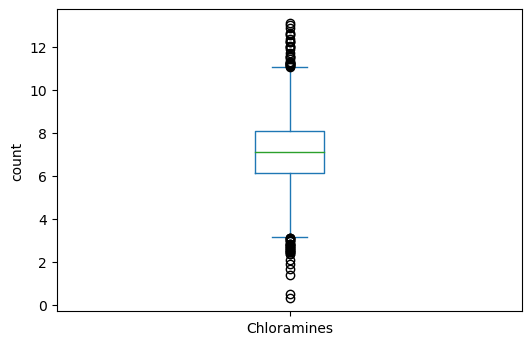

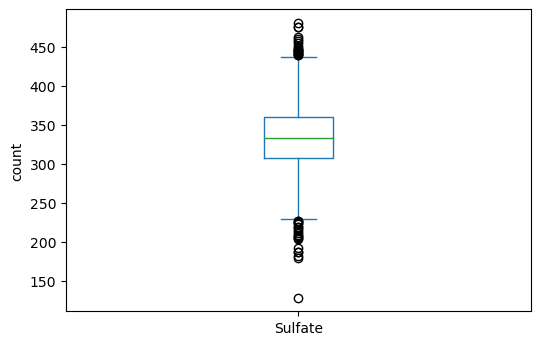

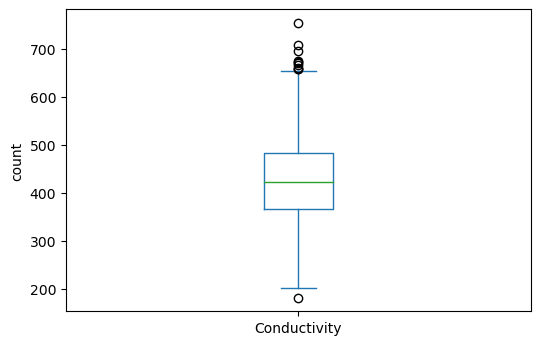

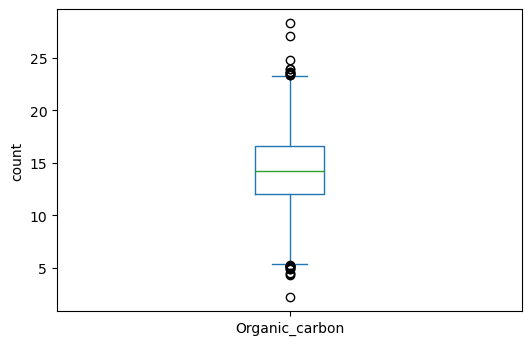

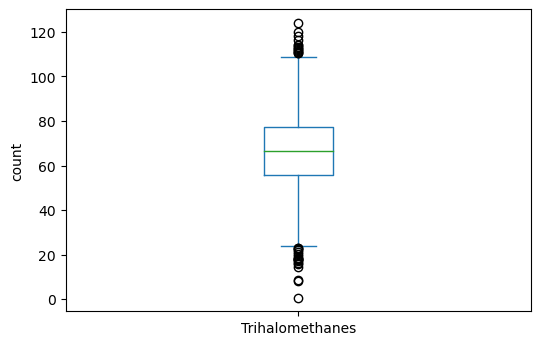

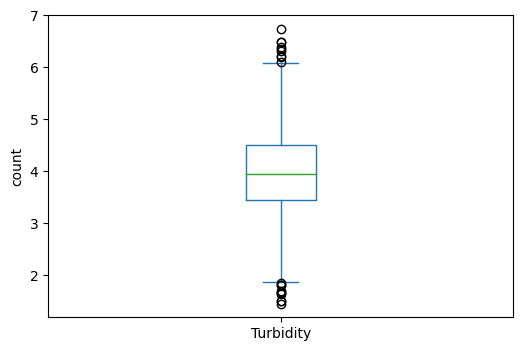

In [17]:
cols = X.columns

for col in cols:
    X[col].plot.box()   
    plt.ylabel('count')
    plt.show()

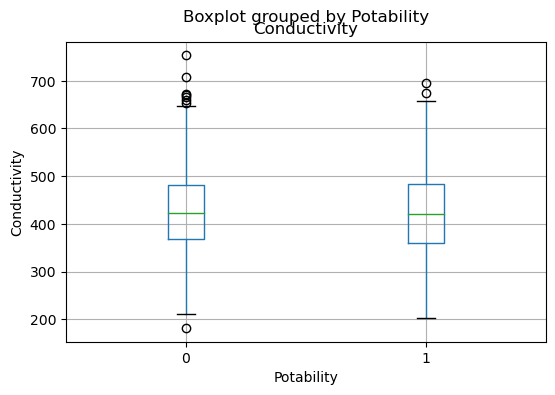

In [18]:
df[['Conductivity','Potability']].boxplot(by='Potability')
plt.ylabel('Conductivity')
plt.xlabel('Potability')
plt.show()

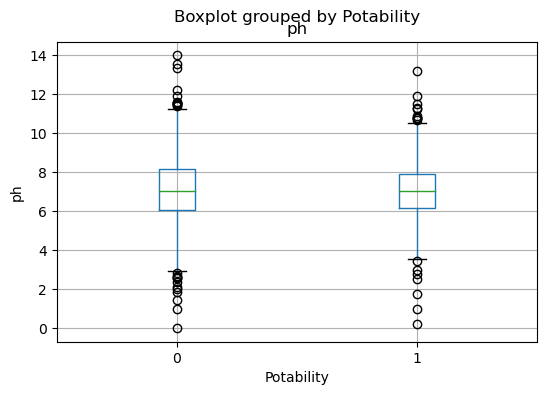

In [19]:
df[['ph','Potability']].boxplot(by='Potability')
plt.ylabel('ph')
plt.xlabel('Potability')
plt.show()

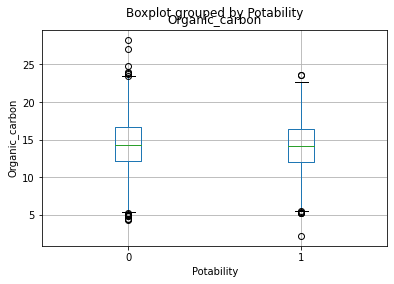

In [10]:
df[['Organic_carbon','Potability']].boxplot(by='Potability')
plt.ylabel('Organic_carbon')
plt.xlabel('Potability')
plt.show()

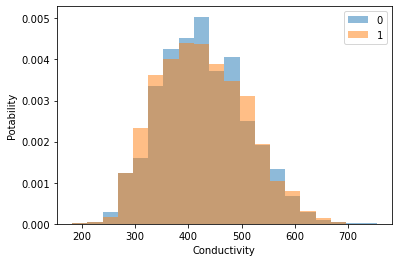

In [8]:
import matplotlib
from matplotlib import pylab as plt

categories = df['Potability'].unique() #get unique value 여긴선 50k 이상 이하
bin_range = (df['Conductivity'].min(),df['Conductivity'].max()) #tuple min to max

for c in categories:
    #plt.hist(df[df['gross-income']==c]['age'],label=c)#,alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    #df['gross-income']==c 50k 이상 이하를 두개로 나눈다 그리고 (df[df['gross-income']==c]['age'])각각 age로 보낸다
    #alpha 는 투명도
    plt.hist(df[df['Potability']==c]['Conductivity'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    
plt.legend()#우측상단
plt.ylabel('Potability')
plt.xlabel('Conductivity')
plt.show()

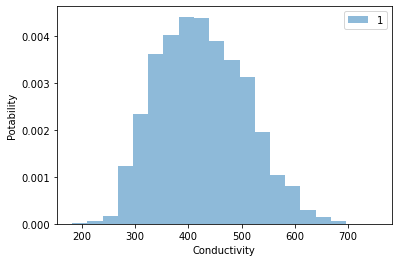

In [9]:
import matplotlib
from matplotlib import pylab as plt

categories = df['Potability'].unique() #get unique value 여긴선 50k 이상 이하
bin_range = (df['Conductivity'].min(),df['Conductivity'].max()) #tuple min to max

plt.hist(df[df['Potability']==c]['Conductivity'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)

plt.legend()#우측상단
plt.ylabel('Potability')
plt.xlabel('Conductivity')
plt.show()

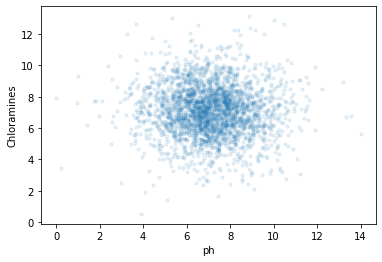

In [7]:
df.plot.scatter('ph','Chloramines',alpha=0.1,s=10) # alpha=0.1,s=10
plt.show()

<AxesSubplot:>

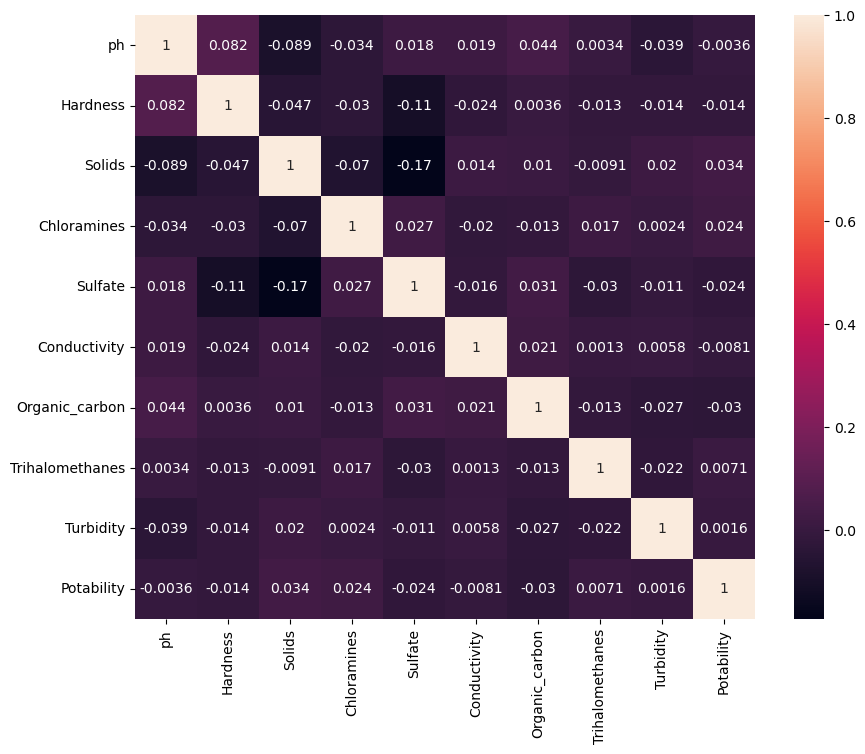

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True)

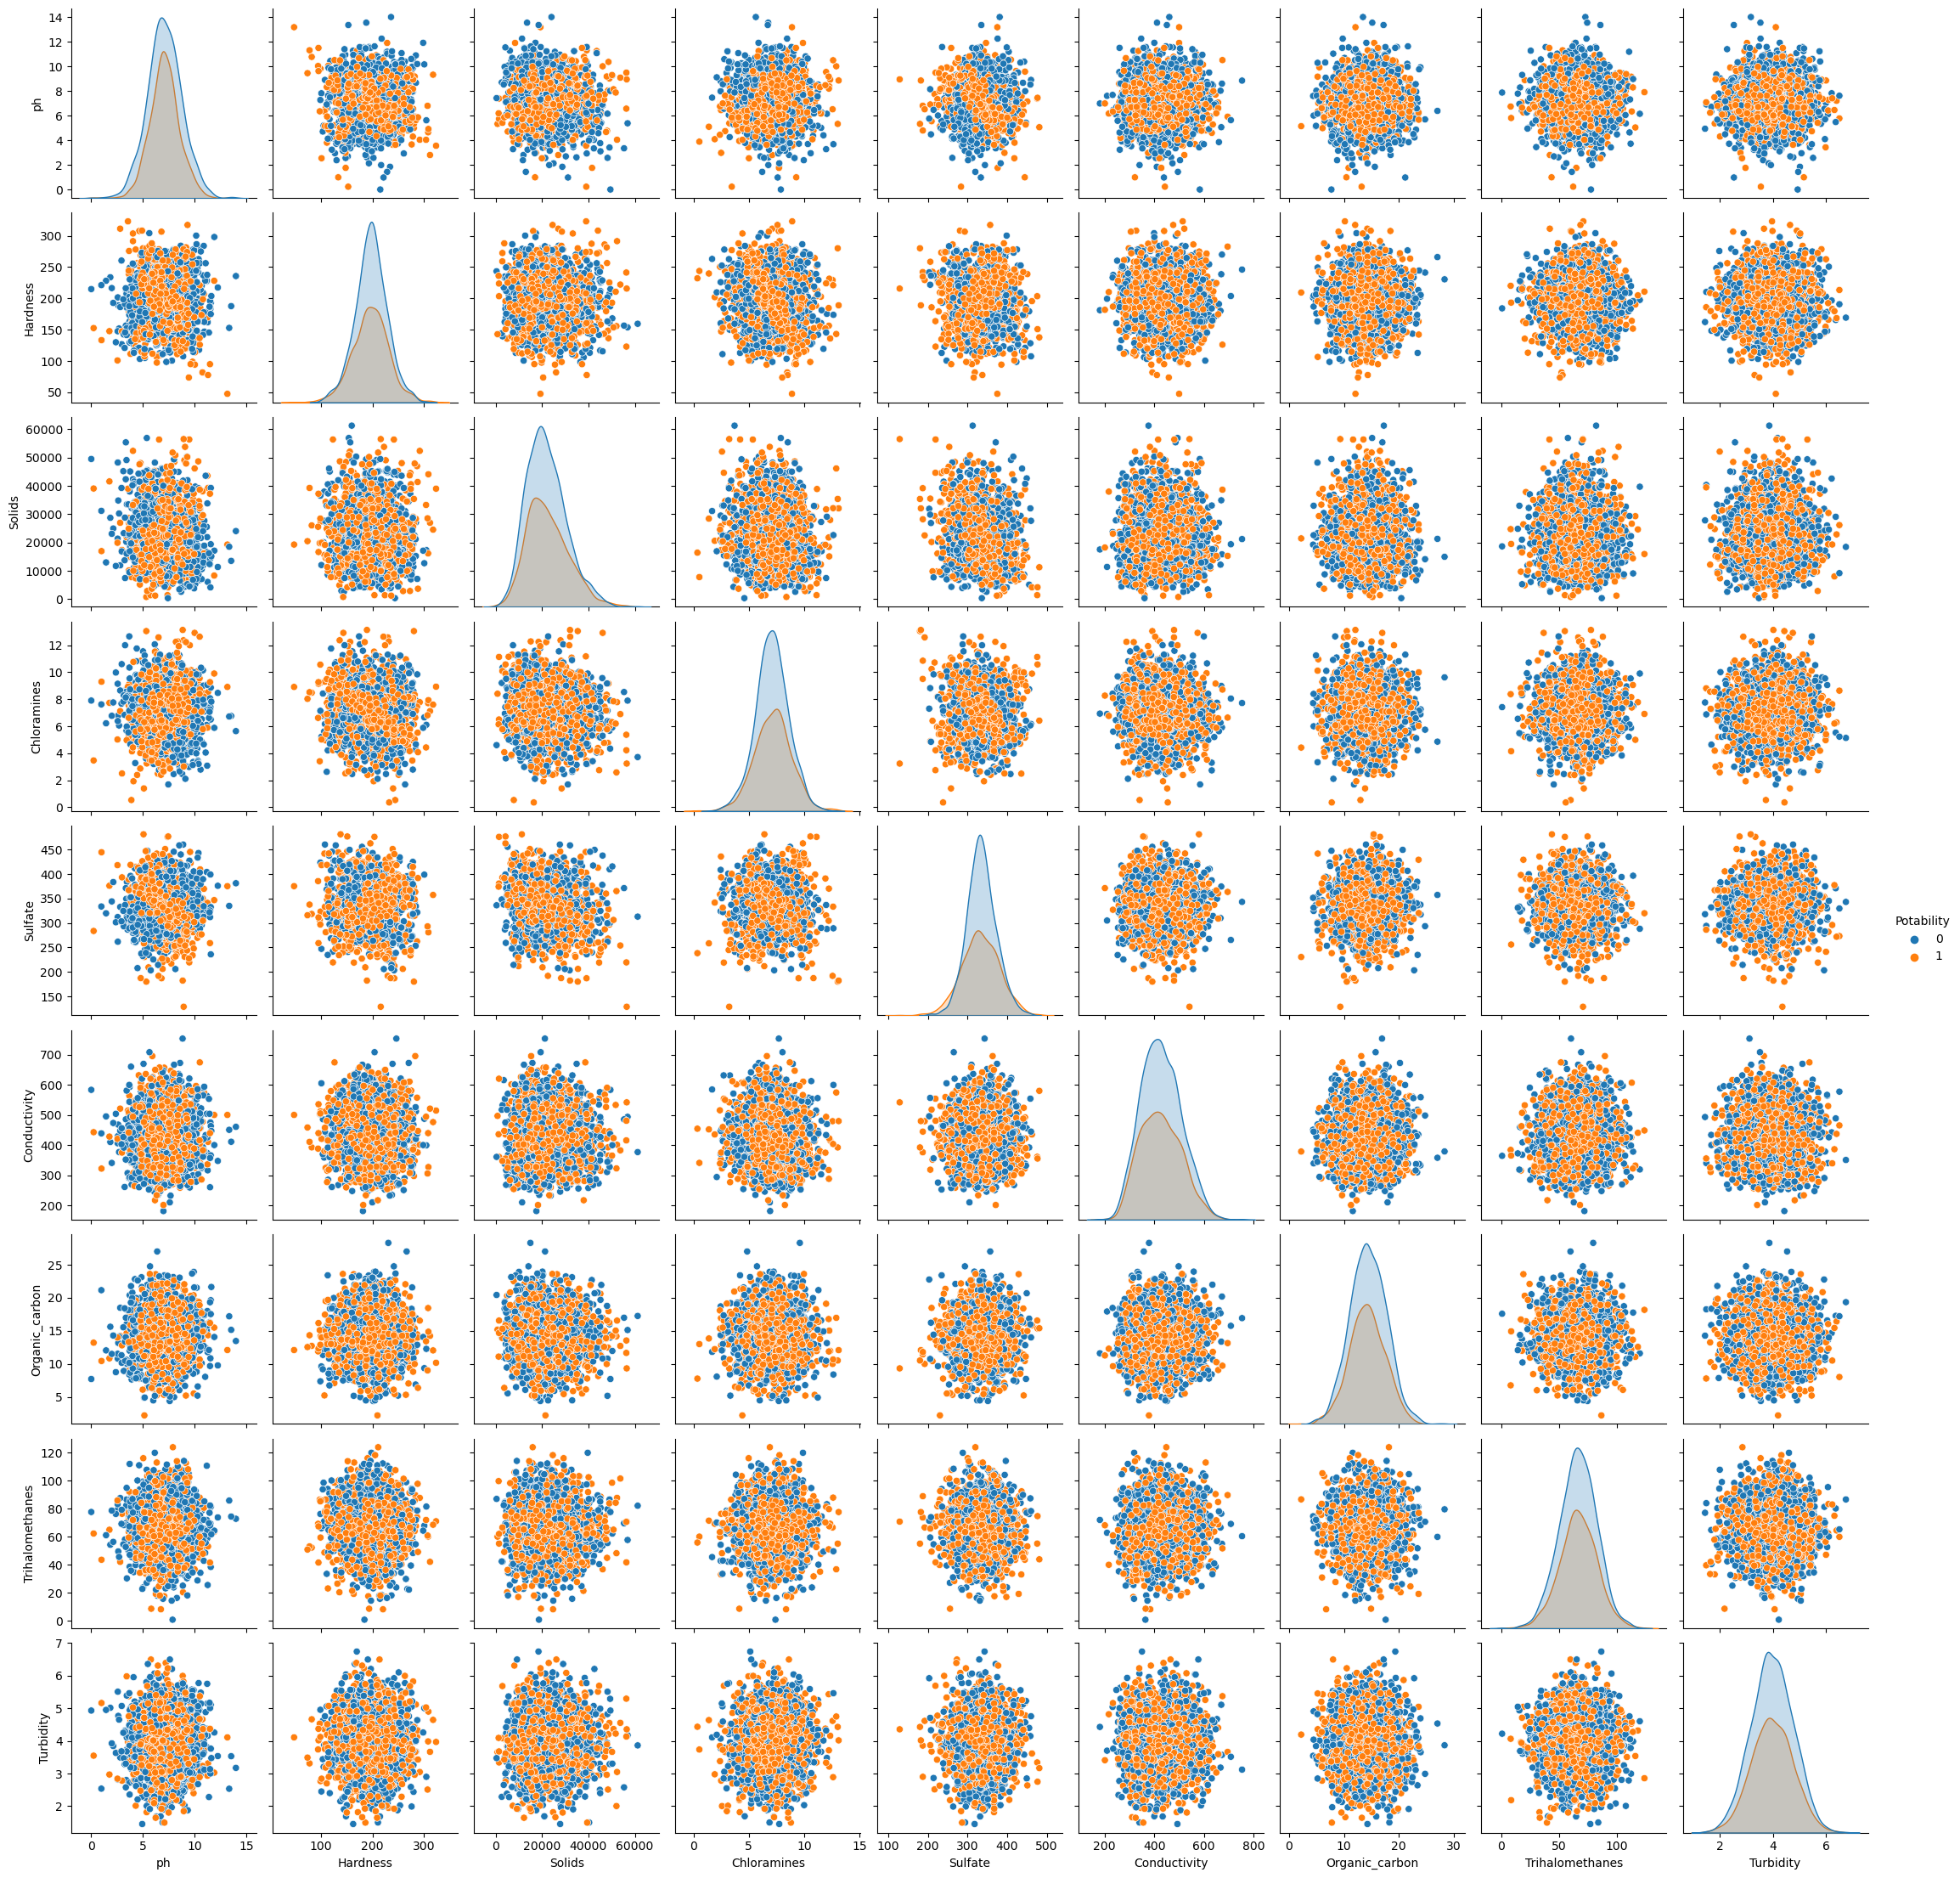

In [15]:
sns.pairplot(df, hue='Potability')

In [15]:
random_state = 47

# first split to separate out the training set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
print(X_other.shape, y_other.shape) # 40% of points are in other

kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
# second split to separate out the validation and test sets
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]

training set: (1049, 9) (1049,)
(2620, 9) (2620,)


In [16]:
std_ftrs = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
scaler = StandardScaler()
print(scaler.fit_transform(X_train[std_ftrs]))
print(scaler.transform(X_val[std_ftrs]))
print(scaler.transform(X_test[std_ftrs]))

[[-0.01806293 -0.51126618  0.7876955  ... -0.66500588 -0.4801402
   0.49280173]
 [-0.00405152  0.57895437  0.34583198 ... -0.399542   -0.13105126
   0.40782184]
 [-0.81460321 -0.3963439   1.57174159 ... -0.52190037  0.2697219
  -0.2143745 ]
 ...
 [ 1.04521164  0.4259384  -0.69255688 ... -0.65002398 -0.39224309
   2.29962056]
 [-0.00521669 -0.53648898  2.01542255 ... -1.05615399  0.59781691
  -1.30296657]
 [ 0.83205836 -0.14421038  0.84373184 ... -0.34362535  1.84801128
  -0.67790123]]
[[ 2.28376011 -1.00831119  1.84869406 ... -0.22401243         nan
  -0.94802707]
 [-0.1358243   0.09334013  0.49619002 ...  2.40048143 -0.90114568
  -0.2056808 ]
 [        nan  1.01396143 -0.81479074 ...  4.27743166  0.83120867
  -0.14265114]
 ...
 [        nan  0.25287316  0.58460319 ...  1.29803449 -0.28762016
   0.78895896]
 [ 1.25049718  2.01685468  1.89197546 ...  1.22615343  0.5155105
   1.89740646]
 [ 1.24544622  0.36777626  1.1806129  ... -0.53233012  1.42185263
   0.57406847]]
[[ 0.02941173  0.22